<a href="https://colab.research.google.com/github/lucapernice/challenge/blob/main/challenge3_ipybn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Challenge 3
### Artificial Neural Network

Using Fully Connected Neural Networks and Convolutional Neural Networks, perform the following tasks on this data set.

**1. Data exploration**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from time import time

import torch
import torch.nn as nn # basic building blocks for graphs
import torch.nn.functional as F # dropout, loss, activation functions, and more
import torchvision # popular datasets, model architectures, and image transformations for computer vision
import torchvision.transforms as transforms # common image transformations

Set batch size:

In [ ]:
BATCH_SIZE = 32

Import dataset:

In [ ]:
data_transforms = transforms.ToTensor()
trainset = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=data_transforms)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.KMNIST(root='./data', train=False, download=True, transform=data_transforms)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

Visualizating data:

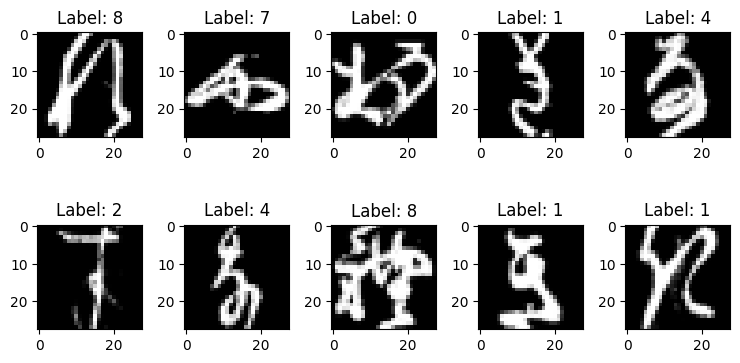

In [ ]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(trainset.data[i], cmap='gray')
    ax.set_title('Label: {}'.format(trainset.targets[i]))
plt.tight_layout()
plt.show()

In [ ]:
print("Single image dimensions:", trainset.data[0].shape)
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Single image dimensions: torch.Size([28, 28])
Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


**2. For each architecture, tune the number of the hidden layers ( ≤3 ), the optimizer, and some hyperparameters of your choice. How many tries to do is up to your discretion.**

Testiamo  Fully Connected NN con numero crescente di layers.


In [ ]:

class OneLayerReLUModel(nn.Module):
    def __init__(self):
        super(OneLayerReLUModel, self).__init__()

        self.l1 = nn.Linear(28 * 28, 10)

    def forward(self, x):

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.relu(x)

        # Softmax computation
        out = F.softmax(x, dim=1)

        return out

In [ ]:

class TwoLayersReLUModel(nn.Module):
    def __init__(self):
        super(TwoLayersReLUModel, self).__init__()

        self.l1 = nn.Linear(28 * 28, 128)
        self.l2 = nn.Linear(128, 10)

    def forward(self, x):

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.relu(x)

        x = self.l2(x)

        # Softmax computation
        out = F.softmax(x, dim=1)

        return out

In [ ]:

class ThreeLayersReLUModel(nn.Module):
    def __init__(self):
        super(ThreeLayersReLUModel, self).__init__()

        self.l1 = nn.Linear(28 * 28, 128)
        self.l2 = nn.Linear(128, 128)
        self.l3 = nn.Linear(128, 10)

    def forward(self, x):

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.relu(x)

        x = self.l2(x)

        x = F.relu(x)

        x = self.l3(x)

        # Softmax computation
        out = F.softmax(x, dim=1)

        return out

In [ ]:

class FourLayersReLUModel(nn.Module):
    def __init__(self):
        super(FourLayersReLUModel, self).__init__()

        self.l1 = nn.Linear(28 * 28, 128)
        self.l2 = nn.Linear(128, 128)
        self.l3 = nn.Linear(128, 128)
        self.l4 = nn.Linear(128, 10)

    def forward(self, x):

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.relu(x)

        x = self.l2(x)

        x = F.relu(x)

        x = self.l3(x)

        x = F.relu(x)

        x = self.l4(x)

        # Softmax computation
        out = F.softmax(x, dim=1)

        return out

In [ ]:

class FourLayersSigmoidModel(nn.Module):
    def __init__(self):
        super(FourLayersSigmoidModel, self).__init__()

        self.l1 = nn.Linear(28 * 28, 128)
        self.l2 = nn.Linear(128, 128)
        self.l3 = nn.Linear(128, 128)
        self.l4 = nn.Linear(128, 10)

    def forward(self, x):

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.sigmoid(x)

        x = self.l2(x)

        x = F.sigmoid(x)

        x = self.l3(x)

        x = F.sigmoid(x)

        x = self.l4(x)

        # Softmax computation
        out = F.softmax(x, dim=1)

        return out

In [ ]:

class FourLayersTanhModel(nn.Module):
    def __init__(self):
        super(FourLayersTanhModel, self).__init__()

        self.l1 = nn.Linear(28 * 28, 128)
        self.l2 = nn.Linear(128, 128)
        self.l3 = nn.Linear(128, 128)
        self.l4 = nn.Linear(128, 10)

    def forward(self, x):

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.tanh(x)

        x = self.l2(x)

        x = F.tanh(x)

        x = self.l3(x)

        x = F.tanh(x)

        x = self.l4(x)

        # Softmax computation
        out = F.softmax(x, dim=1)

        return out

In [ ]:
class ConvolutionalModel(nn.Module):
    def __init__(self):
        super(ConvolutionalModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)

        self.l1 = nn.Linear(32 * 26 * 26, 128)
        self.l2 = nn.Linear(128, 10)


    def forward(self, x):

        x = self.conv1(x)

        x = F.relu(x)

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.relu(x)

        x = self.l2(x)

        logits = F.relu(x)


        # Softmax computation
        out = F.softmax(logits, dim=1)

        return out

Addestramento

In [ ]:
def get_batch_accuracy(logit, target):
    """Obtain accuracy for one batch of data"""
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects / target.size(0)
    return accuracy.item()


In [ ]:
num_epochs = 5
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()


In [ ]:
train_accuracy_1 = np.zeros(4)
models = []

model = OneLayerReLUModel()
models.append(model)

model = TwoLayersReLUModel()
models.append(model)

model = ThreeLayersReLUModel()
models.append(model)

model = FourLayersReLUModel()
models.append(model)


for i in range(4):
  current_model = models[i]

  device = torch.device("cuda")
  current_model.cuda()
  optimizer = torch.optim.Adam(current_model.parameters(), lr=learning_rate)
  for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    # Set the model to training mode: relevant for dropout, batchnorm, etc.
    current_model = current_model.train()
    start = time()
    ## training step
    for j, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = current_model(images)
        loss = criterion(logits, labels)

        # Reset the gradients to zero: otherwise they accumulate!
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.item()
        train_acc += get_batch_accuracy(logits, labels)

    current_model.eval()
  train_accuracy_1[i]=train_acc/j


train_accuracy_1

array([53.79535752, 91.36539488, 91.05022679, 90.12473319])

In [ ]:
train_accuracy_2 = np.zeros(4)
models = []

model = OneLayerReLUModel()
models.append(model)

model = TwoLayersReLUModel()
models.append(model)

model = ThreeLayersReLUModel()
models.append(model)

model = FourLayersReLUModel()
models.append(model)


for i in range(4):
  current_model = models[i]

  device = torch.device("cuda")
  current_model.cuda()
  optimizer = torch.optim.SGD(current_model.parameters(), lr=0.1) # lr=learning_rate
  for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    # Set the model to training mode: relevant for dropout, batchnorm, etc.
    current_model = current_model.train()
    start = time()
    ## training step
    for j, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = current_model(images)
        loss = criterion(logits, labels)

        # Reset the gradients to zero: otherwise they accumulate!
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.item()
        train_acc += get_batch_accuracy(logits, labels)

    current_model.eval()

  train_accuracy_2[i]=train_acc/j


train_accuracy_2

array([80.1310699 , 84.17155816, 84.75020011, 82.57237193])

In [ ]:
train_accuracy_3 = np.zeros(3)
models = []

model = FourLayersReLUModel()
models.append(model)

model = FourLayersSigmoidModel()
models.append(model)

model = FourLayersTanhModel()
models.append(model)


for i in range(3):
  current_model = models[i]

  device = torch.device("cuda")
  current_model.cuda()
  optimizer = torch.optim.Adam(current_model.parameters(), lr=learning_rate)
  for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    # Set the model to training mode: relevant for dropout, batchnorm, etc.
    current_model = current_model.train()
    start = time()
    ## training step
    for j, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = current_model(images)
        loss = criterion(logits, labels)

        # Reset the gradients to zero: otherwise they accumulate!
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.item()
        train_acc += get_batch_accuracy(logits, labels)

    current_model.eval()

  train_accuracy_3[i]=train_acc/j


train_accuracy_3


array([90.74006137, 89.90128068, 92.7828175 ])

''

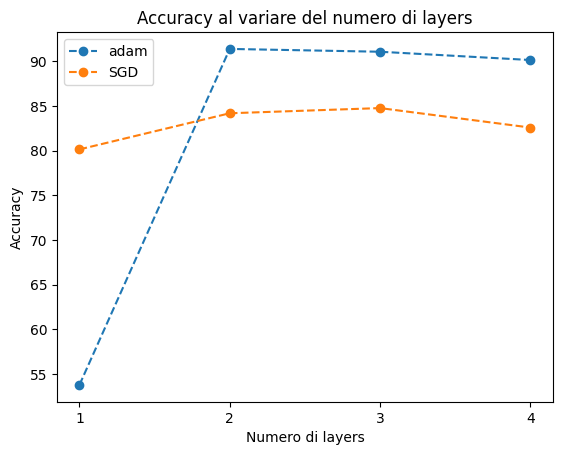

In [ ]:
x = [1, 2, 3, 4]
xi = [1, 2, 3, 4]
fig, ax=plt.subplots()
ax.plot(x, train_accuracy_1, label = "adam",marker='o', linestyle='--')
ax.plot(x, train_accuracy_2, label = "SGD",marker='o', linestyle='--')
plt.xticks(xi, x)
plt.title("Accuracy al variare del numero di layers")
plt.xlabel("Numero di layers")
plt.ylabel("Accuracy")
ax.legend()
;

''

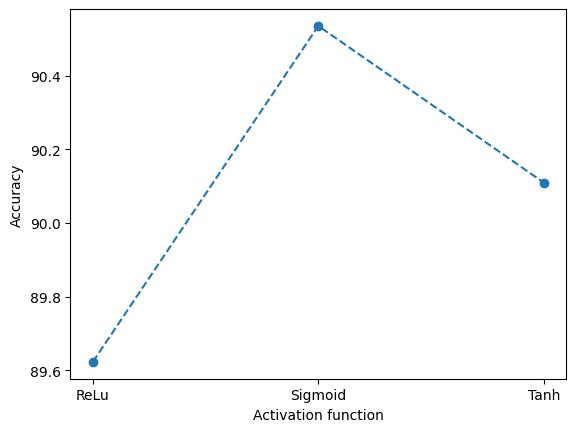

In [ ]:
x = [1, 2, 3]
xi = ['ReLu', 'Sigmoid', 'Tanh']
plt.plot(x,train_accuracy_3, marker='o', linestyle='--')
plt.xticks(x, xi)
plt.xlabel("Activation function")
plt.ylabel("Accuracy")
ax.legend()
;

In [ ]:
class ConvolutionalModel1(nn.Module):
    def __init__(self):
        super(ConvolutionalModel1, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)


        self.l1 = nn.Linear( 32 * 26 * 26, 128)
        self.l2 = nn.Linear(128, 10)


    def forward(self, x):

        x = self.conv1(x)

        x = F.relu(x)

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.relu(x)

        x = self.l2(x)

        logits = F.relu(x)


        # Softmax computation
        out = F.softmax(logits, dim=1)

        return out

In [ ]:
class ConvolutionalModel2(nn.Module):
    def __init__(self):
        super(ConvolutionalModel2, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)

        self.l1 = nn.Linear( 32 * 24 * 24, 128)
        self.l2 = nn.Linear(128, 10)


    def forward(self, x):

        x = self.conv1(x)

        x = F.relu(x)

        x = self.conv2(x)

        x = F.relu(x)

        x = x.flatten(start_dim = 1)

        x = self.l1(x)

        x = F.relu(x)

        x = self.l2(x)

        logits = F.relu(x)


        # Softmax computation
        out = F.softmax(logits, dim=1)

        return out

In [ ]:
# Device selection
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:



# Re-instantiate the model to reset the weights/gradients.
# Weights are initialized by default according to Kaiming He et al. (2015) | https://arxiv.org/abs/1502.01852
model1 = ConvolutionalModel1()
model1 = model1.to(device)  # Move the model to the selected device



In [ ]:

num_epochs = 5
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=learning_rate)



In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    # Set the model to training mode: relevant for dropout, batchnorm, etc.
    model1 = model1.train()
    start = time()
    ## training step
    for i, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model1(images)
        loss = criterion(logits, labels)

        # Reset the gradients to zero: otherwise they accumulate!
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.item()
        train_acc += get_batch_accuracy(logits, labels)

    model1.eval()

    print(f"Epoch: {epoch+1} | Loss: {train_running_loss / i:.4f} | Train Accuracy: {train_acc/i:.4f} | Time: {time()-start:.2f}")

Epoch: 1 | Loss: 1.7663 | Train Accuracy: 69.2052 | Time: 20.47
Epoch: 2 | Loss: 1.6978 | Train Accuracy: 74.2229 | Time: 12.83
Epoch: 3 | Loss: 1.6834 | Train Accuracy: 75.1517 | Time: 15.37
Epoch: 4 | Loss: 1.6401 | Train Accuracy: 80.0277 | Time: 12.98
Epoch: 5 | Loss: 1.5876 | Train Accuracy: 85.8675 | Time: 13.14


In [ ]:
num_epochs = 10
learning_rate = 0.001
model2 = ConvolutionalModel2()
model2 = model2.to(device)
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()




In [ ]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0
    array_train_acc = [0]*num_epochs
    array_train_loss= [0]*num_epochs

    # Set the model to training mode: relevant for dropout, batchnorm, etc.
    model2 = model2.train()
    start = time()
    ## training step
    for i, (images, labels) in enumerate(trainloader):

        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model2(images)
        loss = criterion(logits, labels)

        # Reset the gradients to zero: otherwise they accumulate!
        optimizer.zero_grad()

        # Backpropagation
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.item()


        train_acc += get_batch_accuracy(logits, labels)


    model2.eval()

    array_train_acc[epoch] = train_acc/i
    array_train_loss[epoch]= train_running_loss/ i
    print(f"Epoch: {epoch+1} | Loss: {train_running_loss / i:.4f} | Train Accuracy: {train_acc/i:.4f} | Time: {time()-start:.2f}")

Epoch: 1 | Loss: 1.7440 | Train Accuracy: 71.5965 | Time: 14.58
Epoch: 2 | Loss: 1.5970 | Train Accuracy: 85.8525 | Time: 14.55
Epoch: 3 | Loss: 1.5798 | Train Accuracy: 87.4400 | Time: 14.50
Epoch: 4 | Loss: 1.5740 | Train Accuracy: 87.9819 | Time: 14.48
Epoch: 5 | Loss: 1.5696 | Train Accuracy: 88.2337 | Time: 14.70
Epoch: 6 | Loss: 1.5656 | Train Accuracy: 88.4722 | Time: 14.60
Epoch: 7 | Loss: 1.5637 | Train Accuracy: 88.6089 | Time: 14.43
Epoch: 8 | Loss: 1.5608 | Train Accuracy: 88.8757 | Time: 14.44
Epoch: 9 | Loss: 1.5598 | Train Accuracy: 88.8607 | Time: 14.44
Epoch: 10 | Loss: 1.5067 | Train Accuracy: 95.1207 | Time: 14.77


In [ ]:

test_acc = 0.0
test_running_loss = 0.0


for j, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model2(images)
    loss = criterion(outputs, labels)
    test_acc += get_batch_accuracy(outputs, labels)
    test_running_loss += loss

test_loss =   test_running_loss/j
test_accuracy =  test_acc/j
print(f"Test Accuracy: {test_acc/j:.4f}")

Test Accuracy: 92.8185


In [ ]:
print(f"Test Loss: {test_loss}")
test_accuracy

Test Loss: 1.5402817726135254


92.81850961538461

In [ ]:
array_train_acc = [71.5965,85.8525,87.4400,87.9819,88.2337,88.4722,88.6089,88.8757,88.8607 ,95.1207]

In [ ]:
array_train_loss = [1.7440,1.5970,1.5798,1.5740,1.5696,1.5656 , 1.5637,1.5608,1.5598,1.5067]

''

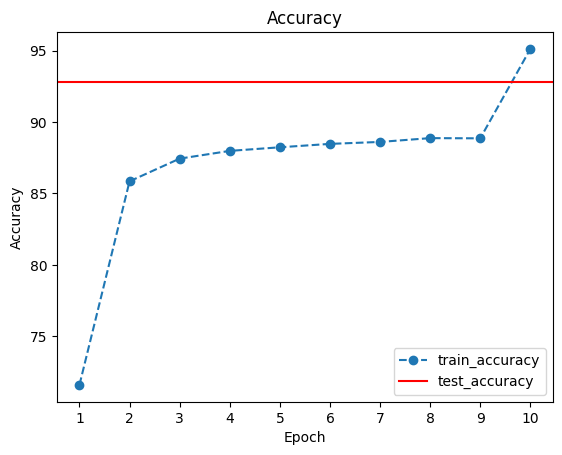

In [ ]:
x = [1, 2, 3, 4,5,6,7,8,9,10]
xi = [1, 2, 3, 4,5,6,7,8,9,10]
fig, ax=plt.subplots()

ax.plot(x, array_train_acc, label = "train_accuracy",marker='o', linestyle='--')
plt.axhline(y=test_accuracy, color='r', linestyle='-',label = 'test_accuracy')
plt.xticks(xi, x)
plt.title("Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
ax.legend()
;

''

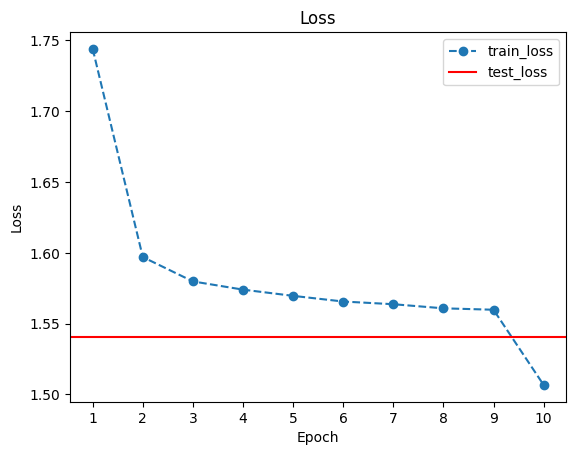

In [ ]:
x = [1, 2, 3, 4,5,6,7,8,9,10]
xi = [1, 2, 3, 4,5,6,7,8,9,10]
fig, ax=plt.subplots()

ax.plot(x, array_train_loss, label = "train_loss",marker='o', linestyle='--')
plt.axhline(y=1.5402817726135254, color='r', linestyle='-',label = 'test_loss')
plt.xticks(xi, x)
plt.title("Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
ax.legend()
;